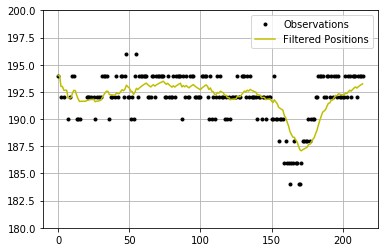

In [35]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from numpy import ma
import matplotlib.pyplot as plt
# Add time
time = np.linspace(-np.pi, np.pi, 201)

df = pd.read_csv('Q66687.csv')
rearwheel_y = df['rearwheel_y']

# Locate and clip relevant snippet of motion, removing unecessary data at the beginning and end
rearwheel_y = rearwheel_y[385: 600]

#rearwheel_y = np.sin(20*time) + 10

# The numpy.ma module provides a convenient way to address the issue of dropout, with masked arrays.
# When an element of the mask is False, the corresponding element of the associated array is valid and is said to be unmasked.
# When an element of the mask is True, the corresponding element of the associated array is said to be masked (invalid).
rearwheel_y = ma.masked_values(rearwheel_y, 0)

# time step
dt = 1
# initial_state_mean
X0 = rearwheel_y[0]
# initial_state_covariance
P0 = 100
n_timesteps = len(rearwheel_y)
n_dim_state = 2
filtered_state_means = np.zeros((n_timesteps, n_dim_state))
filtered_state_covariances = np.zeros((n_timesteps, n_dim_state, n_dim_state))
# Kalman-Filter initialization
kf = KalmanFilter(transition_matrices = np.array([[0.1,0.9], [0, 1]]),
                  observation_matrices = np.array([[1., 0]]),
                  transition_covariance = np.array([[1, 0],[0,1]]),
                  observation_covariance = np.array([[100]]),
                  initial_state_mean = np.array([[0,0]]),
                  initial_state_covariance = np.array([[0.13, 0], [0, 0.13]]))
# iterative estimation for each new measurement
for t in range(n_timesteps):
    if t == 0:
        filtered_state_means[t] = X0
        filtered_state_covariances[t] = P0
    elif t != 0:
        filtered_state_means[t], filtered_state_covariances[t] = (
        kf.filter_update(
            filtered_state_means[t-1],
            filtered_state_covariances[t-1],
            observation = rearwheel_y[t])
        )

# plot of the resulting trajectory
plt.figure()
plt.plot(rearwheel_y, 'k.', label = 'Observations')
plt.plot(filtered_state_means[:, 0], "y-", label="Filtered Positions", markersize=1)
plt.ylim(180, 200)
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())